In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

####Load the dataset


In [3]:
# Set your folder path
folder_path = "/content/drive/MyDrive/FoodDemandProject_dataset/"

#load restaurant_2024_full_dataset.csv dataset
data=pd.read_csv(folder_path+ "restaurant_2024_full_dataset.csv")


In [4]:
data.head()

,date,restaurant_id,meal_id,day_of_week,month,season,is_weekend,demand,revenue,foot_traffic,temperature,precipitation,special_event,holiday,inventory_used,lead_time
0,2024-01-30,1,2,1,1,winter,0,42,556.12,285,6.0,3.83,0,0,45,1
1,2024-01-28,1,1,6,1,winter,1,43,465.66,427,-7.3,0.44,0,0,46,2
2,2024-01-15,1,10,0,1,winter,0,43,617.44,290,-7.9,1.10,0,0,47,2
3,2024-04-28,1,9,6,4,spring,1,35,387.85,414,9.8,1.98,0,0,38,2
4,2024-07-22,1,8,0,7,summer,0,44,435.46,272,29.8,2.97,0,0,45,1


In [5]:
data.shape

(3660, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3660 non-null   object 
 1   restaurant_id   3660 non-null   int64  
 2   meal_id         3660 non-null   int64  
 3   day_of_week     3660 non-null   int64  
 4   month           3660 non-null   int64  
 5   season          3660 non-null   object 
 6   is_weekend      3660 non-null   int64  
 7   demand          3660 non-null   int64  
 8   revenue         3660 non-null   float64
 9   foot_traffic    3660 non-null   int64  
 10  temperature     3660 non-null   float64
 11  precipitation   3660 non-null   float64
 12  special_event   3660 non-null   int64  
 13  holiday         3660 non-null   int64  
 14  inventory_used  3660 non-null   int64  
 15  lead_time       3660 non-null   int64  
dtypes: float64(3), int64(11), object(2)
memory usage: 457.6+ KB


In [7]:
data.columns

Index(['date', 'restaurant_id', 'meal_id', 'day_of_week', 'month', 'season',
       'is_weekend', 'demand', 'revenue', 'foot_traffic', 'temperature',
       'precipitation', 'special_event', 'holiday', 'inventory_used',
       'lead_time'],
      dtype='object')

In [8]:
data.isnull().sum()

,0
date,0
restaurant_id,0
meal_id,0
day_of_week,0
month,0
season,0
is_weekend,0
demand,0
revenue,0
foot_traffic,0


In [9]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

/tmp/ipython-input-2823899295.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], dayfirst=True)


In [10]:
# Encode 'season'
label_encoder = LabelEncoder()
data['season_encoded'] = label_encoder.fit_transform(data['season'])
# Drop the original season column
data.drop(columns=['season'], inplace=True)

In [11]:
# Normalize selected numerical columns
numeric_cols = ['day_of_week','foot_traffic', 'revenue', 'lead_time']

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [12]:
data.head()

,date,restaurant_id,meal_id,day_of_week,month,is_weekend,demand,revenue,foot_traffic,temperature,precipitation,special_event,holiday,inventory_used,lead_time,season_encoded
0,2024-01-30,1,2,-0.991501,1,0,42,1.377286,-0.509945,6.0,3.83,0,0,45,-1.239292,3
1,2024-01-28,1,1,1.504299,1,1,43,0.784371,0.907168,-7.3,0.44,0,0,46,-0.028128,3
2,2024-01-15,1,10,-1.490661,1,0,43,1.779204,-0.460046,-7.9,1.10,0,0,47,-0.028128,3
3,2024-04-28,1,9,1.504299,4,1,35,0.274369,0.777433,9.8,1.98,0,0,38,-0.028128,1
4,2024-07-22,1,8,-1.490661,7,0,44,0.586426,-0.639680,29.8,2.97,0,0,45,-1.239292,2


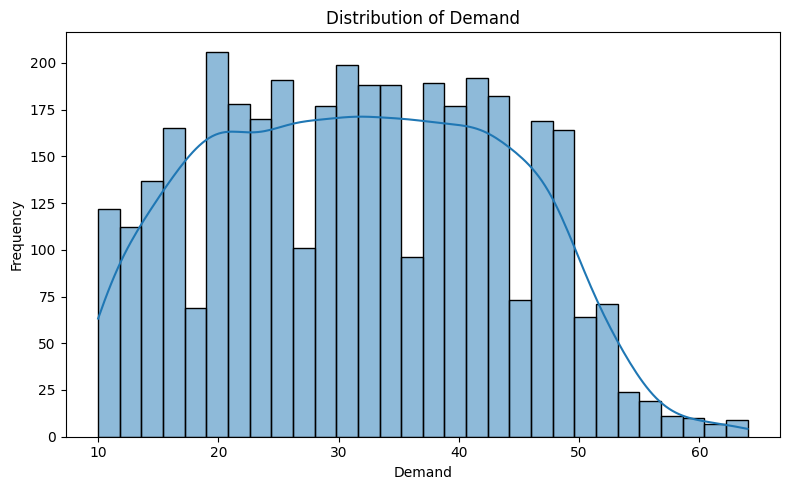

In [13]:
# Demand distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['demand'], bins=30, kde=True)
plt.title("Distribution of Demand")
plt.xlabel("Demand")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

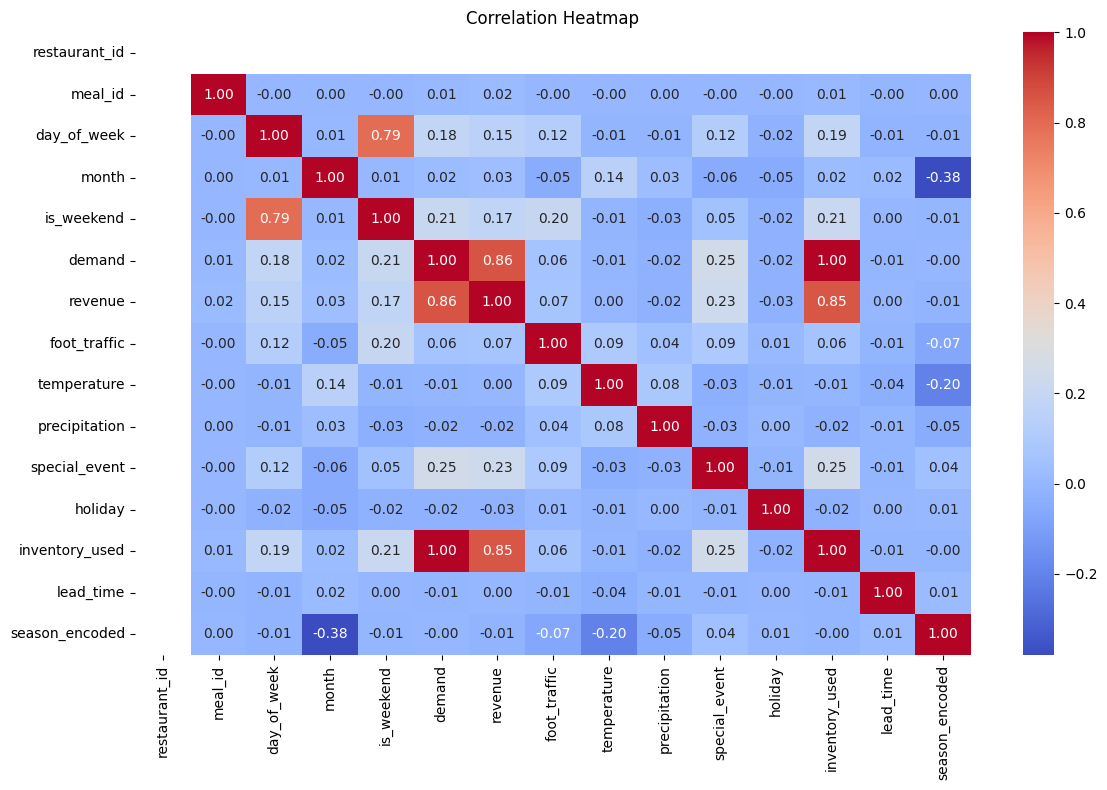

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns=['date']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

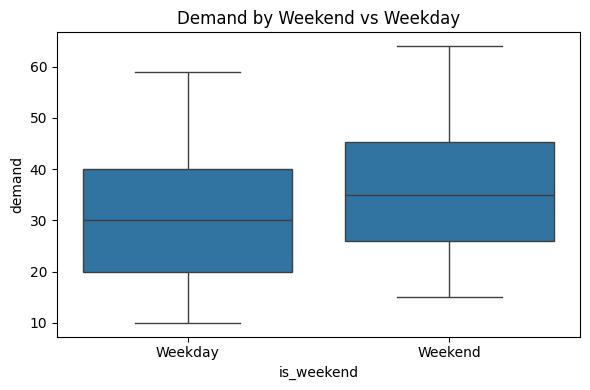

In [15]:
# Boxplot: Weekend vs Weekday
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_weekend', y='demand', data=data)
plt.title("Demand by Weekend vs Weekday")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.tight_layout()
plt.show()

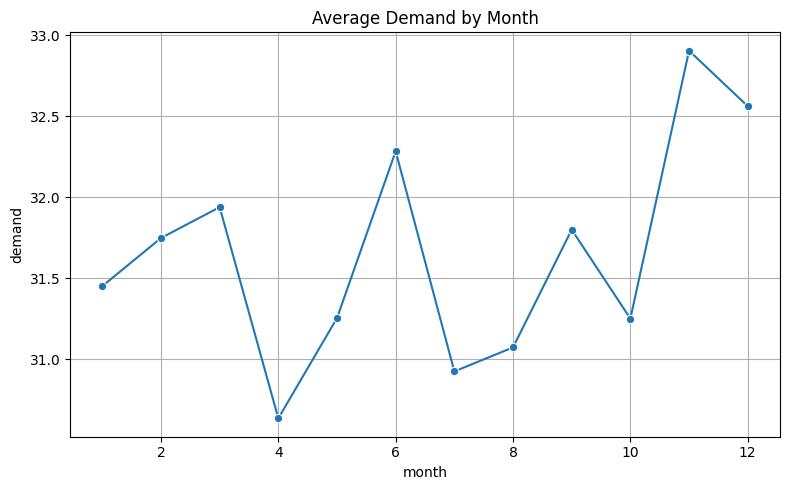

In [16]:
# Monthly seasonality
monthly_avg = data.groupby('month')['demand'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x='month', y='demand', data=monthly_avg, marker='o')
plt.title("Average Demand by Month")
plt.grid(True)
plt.tight_layout()
plt.show()

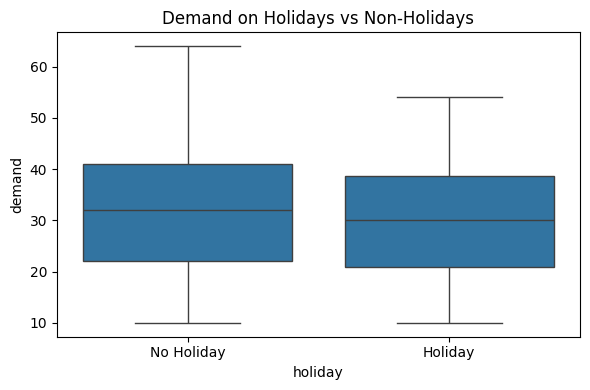

In [17]:
# Holiday impact
plt.figure(figsize=(6, 4))
sns.boxplot(x='holiday', y='demand', data=data)
plt.title("Demand on Holidays vs Non-Holidays")
plt.xticks([0, 1], ['No Holiday', 'Holiday'])
plt.tight_layout()
plt.show()

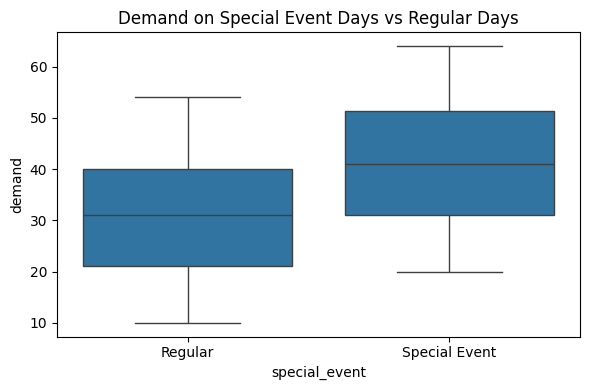

In [18]:
# Special events
plt.figure(figsize=(6, 4))
sns.boxplot(x='special_event', y='demand', data=data)
plt.title("Demand on Special Event Days vs Regular Days")
plt.xticks([0, 1], ['Regular', 'Special Event'])
plt.tight_layout()
plt.show()

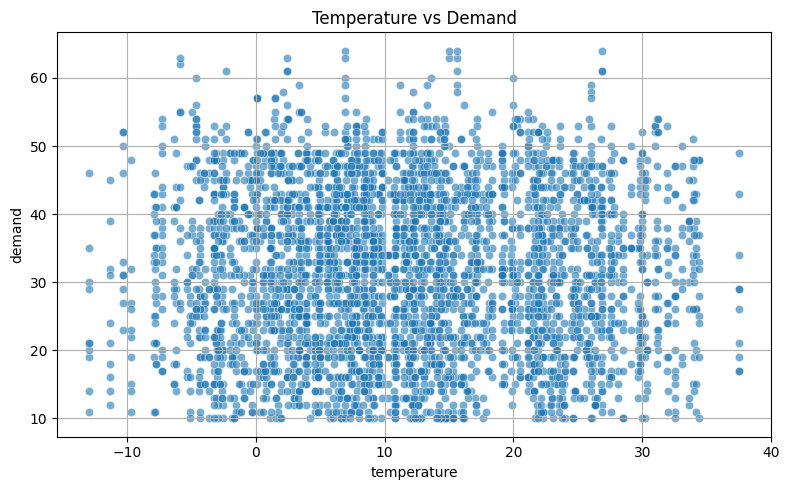

In [19]:
# Temperature vs Demand
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temperature', y='demand', data=data, alpha=0.6)
plt.title("Temperature vs Demand")
plt.grid(True)
plt.tight_layout()
plt.show()

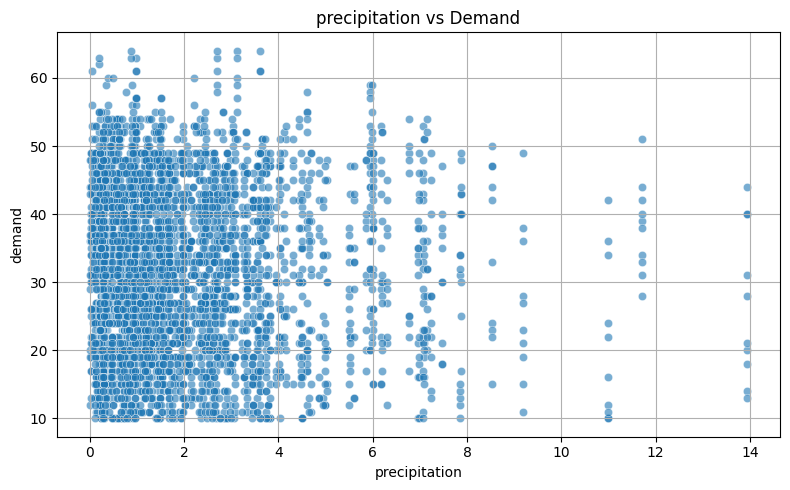

In [20]:
# precipitation vs Demand
plt.figure(figsize=(8, 5))
sns.scatterplot(x='precipitation', y='demand', data=data, alpha=0.6)
plt.title("precipitation vs Demand")
plt.grid(True)
plt.tight_layout()
plt.show()

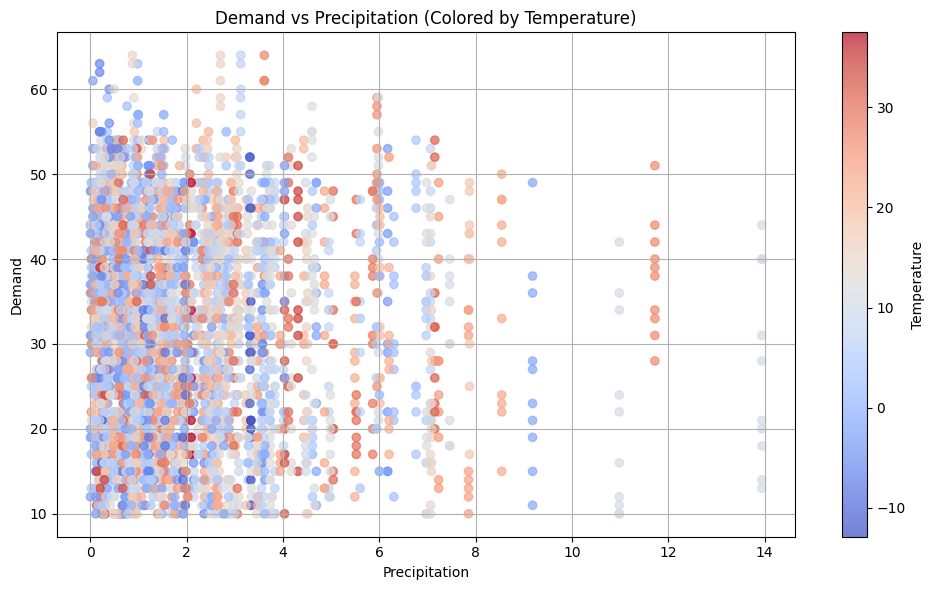

In [21]:
#Demand vs Precipitation with Temperature Color Gradient
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['precipitation'],
    data['demand'],
    c=data['temperature'],
    cmap='coolwarm',
    alpha=0.7
)
plt.title("Demand vs Precipitation (Colored by Temperature)")
plt.xlabel("Precipitation")
plt.ylabel("Demand")
cbar = plt.colorbar(scatter)
cbar.set_label("Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
#  Sort by date
data = data.sort_values('date')

#  Create lag features
data['lag_1_demand'] = data['demand'].shift(1)
data['lag_2_demand'] = data['demand'].shift(2)
data['lag_3_demand'] = data['demand'].shift(3)

# Create rolling average and std features
data['rolling_mean_3d'] = data['demand'].shift(1).rolling(window=3).mean()
data['rolling_std_7d'] = data['demand'].shift(1).rolling(window=7).std()

# Create interaction features
data['interaction_temp_precip'] = data['temperature'] * data['precipitation']
data['weekend_event'] = data['is_weekend'] * data['special_event']


# Drop NA rows (from lag/rolling calculations)
data.dropna(inplace=True)

print("Feature engineering complete")
data.head()


Feature engineering complete


,date,restaurant_id,meal_id,day_of_week,month,is_weekend,demand,revenue,foot_traffic,temperature,...,inventory_used,lead_time,season_encoded,lag_1_demand,lag_2_demand,lag_3_demand,rolling_mean_3d,rolling_std_7d,interaction_temp_precip,weekend_event
1828,2024-01-01,1,7,-1.490661,1,0,31,0.136398,-0.819314,-1.7,...,32,-1.239292,3,13.0,42.0,43.0,32.666667,12.569805,-0.986,0
3165,2024-01-01,1,5,-1.490661,1,0,41,1.190222,-0.819314,-1.7,...,44,1.183036,3,31.0,13.0,42.0,28.666667,12.311435,-0.986,0
2638,2024-01-01,1,6,-1.490661,1,0,41,0.139348,-0.819314,-1.7,...,42,-1.239292,3,41.0,31.0,13.0,28.333333,12.365467,-0.986,0
1813,2024-01-02,1,4,-0.991501,1,0,13,-1.618817,-0.450067,-3.1,...,15,-1.239292,3,41.0,41.0,31.0,37.666667,11.733144,-3.658,0
3258,2024-01-02,1,7,-0.991501,1,0,49,0.044112,-0.450067,-3.1,...,53,1.183036,3,13.0,41.0,41.0,31.666667,13.576941,-3.658,0


####Feature engineering for regression focusing on weather


In [23]:
# Features already exist
# temperature, precipitation, season_encoded, month, holiday, special_event

#Temperature Binning
data['temp_bin'] = pd.cut(data['temperature'], bins=[-10, 0, 10, 20, 30, 40], labels=[0, 1, 2, 3, 4])


#Rainy Day Flag
data['is_rainy'] = (data['precipitation'] > 0.5).astype(int)

#Extremely Hot or Cold Flags
data['very_cold'] = (data['temperature'] < 5).astype(int)
data['very_hot'] = (data['temperature'] > 30).astype(int)

# Interaction Terms
data['temp_x_month'] = data['temperature'] * data['month']
data['precip_x_season'] = data['precipitation'] * data['season_encoded']

#Holiday/Event Proximity
data['is_day_before_holiday'] = data['holiday'].shift(-1).fillna(0)
data['is_day_after_holiday'] = data['holiday'].shift(1).fillna(0)

# Temperature Change From Previous Day
data['temp_diff'] = data['temperature'].diff().fillna(0)

In [24]:
print(data.head())

           date  restaurant_id  meal_id  day_of_week  month  is_weekend  \
1828 2024-01-01              1        7    -1.490661      1           0   
3165 2024-01-01              1        5    -1.490661      1           0   
2638 2024-01-01              1        6    -1.490661      1           0   
1813 2024-01-02              1        4    -0.991501      1           0   
3258 2024-01-02              1        7    -0.991501      1           0   

      demand   revenue  foot_traffic  temperature  ...  weekend_event  \
1828      31  0.136398     -0.819314         -1.7  ...              0   
3165      41  1.190222     -0.819314         -1.7  ...              0   
2638      41  0.139348     -0.819314         -1.7  ...              0   
1813      13 -1.618817     -0.450067         -3.1  ...              0   
3258      49  0.044112     -0.450067         -3.1  ...              0   

      temp_bin  is_rainy  very_cold  very_hot  temp_x_month  precip_x_season  \
1828         0         1      

In [25]:
print(data[['temp_bin', 'is_rainy', 'very_hot', 'very_cold', 'temp_x_month',
            'precip_x_season', 'is_day_before_holiday', 'is_day_after_holiday', 'temp_diff']].head())

     temp_bin  is_rainy  very_hot  very_cold  temp_x_month  precip_x_season  \
1828        0         1         0          1          -1.7             1.74   
3165        0         1         0          1          -1.7             1.74   
2638        0         1         0          1          -1.7             1.74   
1813        0         1         0          1          -3.1             3.54   
3258        0         1         0          1          -3.1             3.54   

      is_day_before_holiday  is_day_after_holiday  temp_diff  
1828                    0.0                   0.0        0.0  
3165                    0.0                   0.0        0.0  
2638                    0.0                   0.0        0.0  
1813                    0.0                   0.0       -1.4  
3258                    0.0                   0.0        0.0  


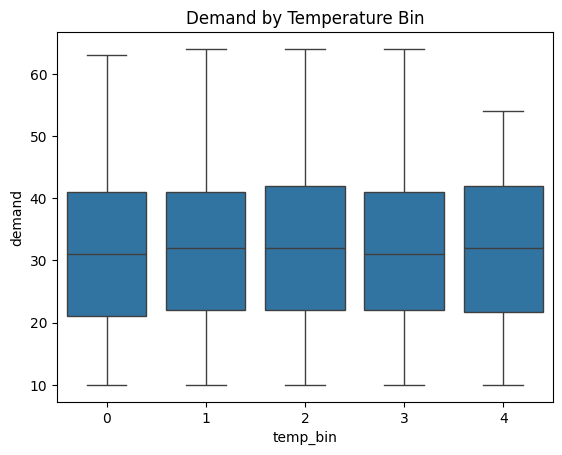

In [26]:
# Temperature bin vs demand:

sns.boxplot(x='temp_bin', y='demand', data=data)
plt.title('Demand by Temperature Bin')
plt.show()

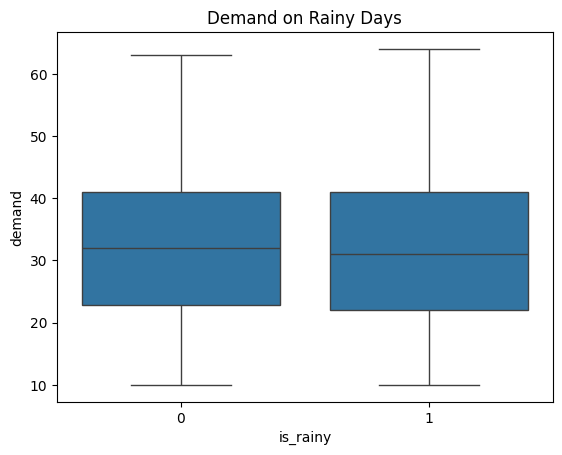

In [27]:
#Rainy day vs demand
sns.boxplot(x='is_rainy', y='demand', data=data)
plt.title('Demand on Rainy Days')
plt.show()


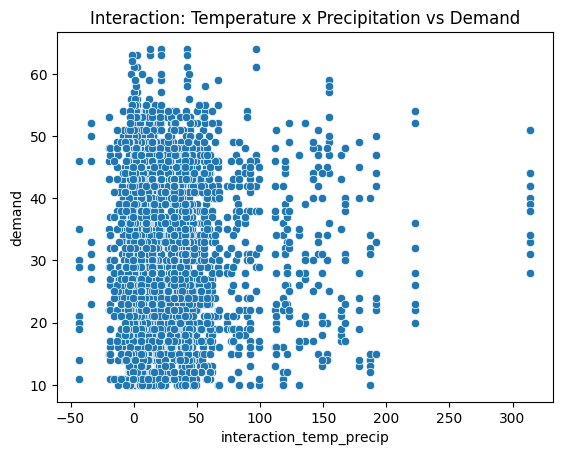

In [28]:
#Scatter plot of interaction terms
sns.scatterplot(x='interaction_temp_precip', y='demand', data=data)
plt.title('Interaction: Temperature x Precipitation vs Demand')
plt.show()

In [29]:
#Correlation with Demand (only for numeric)
correlation = data.corr(numeric_only=True)
print(correlation['demand'].sort_values(ascending=False))

demand                     1.000000
inventory_used             0.995783
revenue                    0.857821
special_event              0.249910
weekend_event              0.211798
is_weekend                 0.207527
day_of_week                0.184705
rolling_mean_3d            0.116810
lag_1_demand               0.093466
lag_2_demand               0.064729
lag_3_demand               0.060346
foot_traffic               0.060166
rolling_std_7d             0.039346
month                      0.021888
meal_id                    0.013898
temp_diff                  0.000392
precip_x_season           -0.000126
season_encoded            -0.000280
very_cold                 -0.000857
very_hot                  -0.001200
interaction_temp_precip   -0.001388
lead_time                 -0.004933
temperature               -0.005949
temp_x_month              -0.007434
is_day_before_holiday     -0.010016
is_day_after_holiday      -0.010016
is_rainy                  -0.013804
holiday                   -0

###Training the regression

In [44]:
# Features to use
features = [
    'inventory_used', 'revenue', 'special_event', 'weekend_event', 'is_weekend',
    'day_of_week', 'rolling_mean_3d', 'lag_1_demand', 'lag_2_demand', 'lag_3_demand',
    'foot_traffic', 'rolling_std_7d', 'month', 'meal_id', 'lead_time',
    'is_day_before_holiday', 'is_day_after_holiday', 'holiday'
]

X = data[features]
y = data['demand']

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [46]:
accuracy_score=model.score(X_test, y_test)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.991748176369545


In [47]:
# Ridge Regression with GridSearchCV
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

print("Ridge RMSE:", round(rmse, 3))
print("Ridge R²:", round(r2, 3))

Ridge RMSE: 1.077
Ridge R²: 0.992


In [48]:
# accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

print("MAE:", round(mae, 3))
print("MSE:", round(mse, 3))
print("RMSE:", round(rmse, 3))
print("R²:", round(r2, 3))

MAE: 0.944
MSE: 1.161
RMSE: 1.077
R²: 0.992


In [50]:
accuracy_score=ridge.score(X_test, y_test)
print("Accuracy Score:", accuracy_score)


Accuracy Score: 0.9917665859105307


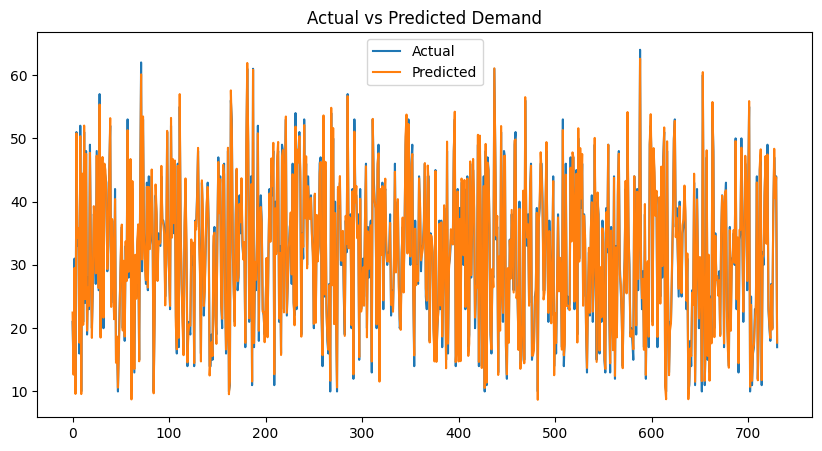

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_ridge, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Demand")
plt.show()

In [52]:
#save the model
import joblib
joblib.dump(ridge, 'ridge_model.pkl')


['ridge_model.pkl']

In [54]:
# Save the Linear Regression model
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

# Restaurant Demand and Revenue Prediction

## Project Description
This project aims to predict restaurant demand and revenue using historical data and various influencing factors such as weather, special events, and inventory.

## Data
The project uses the `restaurant_2024_full_dataset.csv` dataset, which contains information about daily restaurant operations, including date, restaurant ID, meal ID, day of the week, month, season, weekend status, demand, revenue, foot traffic, temperature, precipitation, special event status, holiday status, inventory used, and lead time.


## Feature Engineering
Several new features were engineered to improve the model's predictive power:
- **Date-related features**: Day of the week, month, season, and weekend status were extracted or used directly.
- **Lag features**: Previous days' demand (lag_1, lag_2, lag_3) were created to capture temporal dependencies.
- **Rolling statistics**: Rolling mean (3-day) and standard deviation (7-day) of demand were calculated.
- **Interaction terms**: Interactions between temperature and precipitation, and weekend status and special events were created.
- **Weather-related features**: Temperature was binned, a rainy day flag was added, and flags for very cold/hot temperatures were created.
- **More Interaction terms**: Interactions between temperature and month, and precipitation and season were created.
- **Holiday/Event Proximity**: Flags for the day before and after a holiday were added.
- **Temperature Change**: The difference in temperature from the previous day was calculated.

Categorical features like 'season' were label encoded. Numerical features were scaled using StandardScaler.

## Modeling
The project explores linear regression models for predicting demand and revenue:
- **Linear Regression**: A basic linear model was trained.
- **Ridge Regression**: Ridge regularization was applied to address multicollinearity and prevent overfitting. `GridSearchCV` was used to tune the `alpha` hyperparameter.
- **Lasso Regression**: Lasso regularization was applied, which also performs feature selection. `GridSearchCV` was used to tune the `alpha` hyperparameter.

## Evaluation
The models were evaluated using common regression metrics:
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between actual and predicted values.
- **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, providing an error metric in the same units as the target variable.
- **R-squared (R²)**: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

Visualizations such as the distribution of demand, correlation heatmap, and actual vs. predicted plots were used to understand the data and model performance.

## How to Run the Code
1.  **Clone the repository (if applicable)**: If this project is in a repository, clone it to your local machine or Google Drive.
2.  **Mount Google Drive**: If using Google Colab and your data is in Drive, run the cell to mount Google Drive.
3.  **Install necessary libraries**: Ensure you have pandas, numpy, scikit-learn, matplotlib, and seaborn installed.
4.  **Load the data**: Update the `folder_path` variables in the code to point to the location of your datasets.
5.  **Run the notebook cells sequentially**: Execute each code cell in order, from data loading and exploration through feature engineering, modeling, and evaluation.

The trained models are saved as `.pkl` files using `joblib` for later use.